In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

In [79]:
# 로컬에서 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [80]:
import os, natsort, re
from tqdm import tqdm
import time, random

- 2000년 1월 1주차부터 2024년 7월 1주차 까지의 베스트셀러 데이터 수집


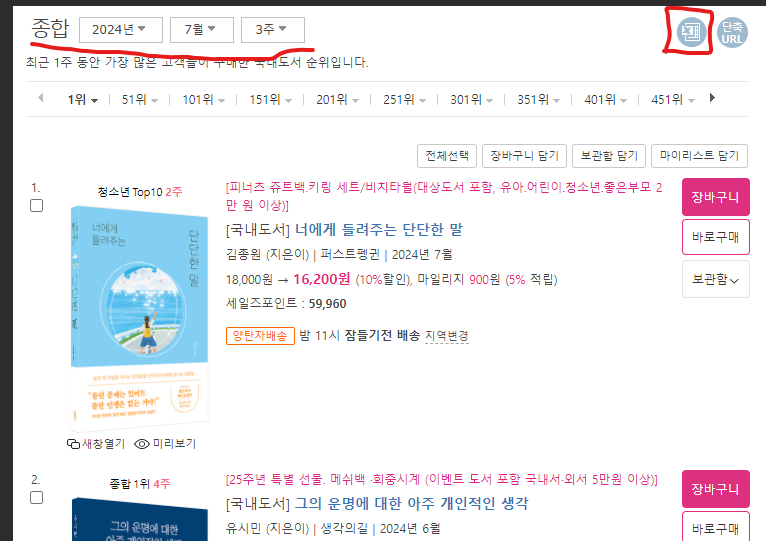

In [ ]:
# 위 사진과 보다시피 사이트 자체에서 xls 다운로드 링크 제공
import requests
import time
year = range(2000,2024)
month = range(1,13)
week = range(1,6)
# Define the URL to download the CSV file
url_format = 'http://www.aladin.co.kr/shop/common/wbest_excel.aspx?BestType=Bestseller&BranchType=1&CID=0&Year={}&Month={}&Week={}'
for y in year:
     for m in month:
          for w in week:
               print(url_format.format(y,m,w))
               url = url_format.format(y,m,w)
               response = requests.get(url)
               if response.status_code == 200:
                    file_path = '../csv/{}년{}월{}주_20240710.csv'                            
                    with open(file_path.format(y,m,w), 'wb') as file:
                        file.write(response.content)
                    print(f'File downloaded successfully and saved as {file_path}')
               else:
                    print(f'Failed to download the file. Status code: {response.status_code}')
               
               time.sleep(5)

- 베스트셀러 csv 파일들 합쳐보기

In [ ]:
import glob

# CSV 파일이 저장된 디렉토리 경로
file_path = "../csv"
files = glob.glob(file_path + "**/*.csv")

# 데이터프레임을 저장할 리스트
dataframes = []

# 각 파일을 반복 처리
for file in files:
    # 파일 이름에서 Year, Month, Week 추출
    filename = file.split('_')[-2].split('\\')[-1]   
    # CSV 파일을 데이터프레임으로 읽기, 마지막 3줄은 광고문구이므로 제외
    df = pd.read_csv(file,skipfooter=3, engine='python',on_bad_lines='skip')
    # 데이터프레임에 날짜 열 추가
    df['날짜'] = filename
    # ItemId 컬럼을 int 타입으로 변환
    df['ItemId'] = df['ItemId'].astype(int)
    # 데이터프레임을 리스트에 추가
    dataframes.append(df)

# 모든 데이터프레임을 결합
combined_df = pd.concat(dataframes, ignore_index=True)

# 결합된 데이터프레임을 새로운 CSV 파일로 저장
combined_df.to_csv(file_path + "combined_bestseller_data.csv", index=False)

In [82]:
combined_df = pd.read_csv('../csvcombined_bestseller_data.csv') #다시 다운받지 않고 전에 병합한 csv 파일 불러옴

C:\Users\junsung\AppData\Local\Temp\ipykernel_18204\1528453319.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('../csvcombined_bestseller_data.csv') #다시 다운받지 않고 전에 병합한 csv 파일 불러옴


In [83]:
combined_df

,순번/순위,구분,상품명,ItemId,ISBN13,부가기호,저자/아티스트,출판사/제작사,출간일,정가,판매가,마일리지,세일즈포인트,대표분류(대분류명),날짜
0,1,국내도서,누가 내 치즈를 옮겼을까?,226139,9788980103034.0,3840.0,"스펜서 존슨 지음, 이영진 옮김",진명출판사,20000315,"7,000","6,300",350점,29660,자기계발,2000년10월1주
1,2,국내도서,부자 아빠 가난한 아빠 1,220359,9788982732362.0,3320.0,"로버트 기요사키, 샤론 레흐트 지음 | 형선호 옮김",민음인,20000210,"12,000","10,800",600점,22994,경제경영,2000년10월1주
2,3,외국도서,Collins Cobuild English Dictionary (2판) (Hardc...,249786,NaN,NaN,HarperCollins 편집부 엮음,Harper Collins,20000101,"34,000","27,200",820점,708,외국어,2000년10월1주
3,4,국내도서,부자 아빠의 투자 가이드,247785,9788982732645.0,3320.0,"로버트 기요사키 지음, 박슬라 옮김",민음인,20140926,"18,000","16,200",900점,9304,경제경영,2000년10월1주
4,5,국내도서,부자 아빠 가난한 아빠 2,231099,9788982732508.0,3320.0,"로버트 기요사키 지음, 안진환 옮김",민음인,20121127,"17,000","15,300",850점,24887,경제경영,2000년10월1주
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415581,996,국내도서,뉴턴 사과로 우주의 비밀을 열다,38318659,9788992161794,74840,"캐슬린 크럴 지음, 장석봉 옮김, 보리스 쿨리코프 그림",초록개구리,20140325,"9,500","8,550",470점,3593,어린이,2024년7월2주
1415582,997,국내도서,어두운 물,341327066,9791166836008,03810,전건우 지음,&(앤드),20240626,"15,000","13,500",750점,3070,소설/시/희곡,2024년7월2주
1415583,998,국내도서,자유의 가격,341940640,9791170800514,03810,신미경 지음,뜻밖,20240703,"17,000","15,300",850점,3030,에세이,2024년7월2주
1415584,999,국내도서,벤처 마인드셋,341149203,9788925574912,03320,"일리야 스트레불라예프.알렉스 당 지음, 이영래 옮김",알에이치코리아(RHK),20240612,"25,000","22,500","1,250점",2910,경제경영,2024년7월2주


In [84]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415586 entries, 0 to 1415585
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   순번/순위       1415586 non-null  int64 
 1   구분          1415479 non-null  object
 2   상품명         1415479 non-null  object
 3   ItemId      1415586 non-null  int64 
 4   ISBN13      1401957 non-null  object
 5   부가기호        1225052 non-null  object
 6   저자/아티스트     1412914 non-null  object
 7   출판사/제작사     1414962 non-null  object
 8   출간일         1415586 non-null  int64 
 9   정가          1415586 non-null  object
 10  판매가         1415586 non-null  object
 11  마일리지        1415586 non-null  object
 12  세일즈포인트      1415586 non-null  int64 
 13  대표분류(대분류명)  1410344 non-null  object
 14  날짜          1415586 non-null  object
dtypes: int64(4), object(11)
memory usage: 162.0+ MB


In [85]:
# ItemId가 중복된 행은 한개 행만 남기고 제거
bestseller_df_unique = combined_df.drop_duplicates(subset=['ItemId'], keep='first')
# 국대도서만 선택
bestseller_df_unique = bestseller_df_unique[bestseller_df_unique['구분']== '국내도서']
# 필요하지 않은 열 삭제
bestseller_df_unique.drop(columns=['ISBN13','부가기호','구분','순번/순위','마일리지'],inplace=True)
bestseller_df_unique

,상품명,ItemId,저자/아티스트,출판사/제작사,출간일,정가,판매가,세일즈포인트,대표분류(대분류명),날짜
0,누가 내 치즈를 옮겼을까?,226139,"스펜서 존슨 지음, 이영진 옮김",진명출판사,20000315,"7,000","6,300",29660,자기계발,2000년10월1주
1,부자 아빠 가난한 아빠 1,220359,"로버트 기요사키, 샤론 레흐트 지음 | 형선호 옮김",민음인,20000210,"12,000","10,800",22994,경제경영,2000년10월1주
3,부자 아빠의 투자 가이드,247785,"로버트 기요사키 지음, 박슬라 옮김",민음인,20140926,"18,000","16,200",9304,경제경영,2000년10월1주
4,부자 아빠 가난한 아빠 2,231099,"로버트 기요사키 지음, 안진환 옮김",민음인,20121127,"17,000","15,300",24887,경제경영,2000년10월1주
5,창가의 토토,233350,"구로야나기 테츠코 지음, 김난주 옮김, 이와사키 치히로 그림",프로메테우스,20040129,"11,000","9,900",43114,소설/시/희곡,2000년10월1주
...,...,...,...,...,...,...,...,...,...,...
1415566,백앤아 6 : 저주 걸린 장난감 가게,340091093,"돌만 그림, 지유리 글, 백앤아 원작",샌드박스스토리 키즈,20240529,"16,800","15,120",9140,어린이,2024년7월2주
1415571,타키 포오의 이세계 여행사 6,339535332,"송도수 지음, 이지운 그림, 캐릭온TV 원작",대원키즈,20240517,"14,500","13,050",7805,어린이,2024년7월2주
1415575,달샤베트,340730135,백희나 지음,Storybowl(스토리보울),20240610,"15,000","13,500",5505,유아,2024년7월2주
1415581,뉴턴 사과로 우주의 비밀을 열다,38318659,"캐슬린 크럴 지음, 장석봉 옮김, 보리스 쿨리코프 그림",초록개구리,20140325,"9,500","8,550",3593,어린이,2024년7월2주


In [86]:
# 결측치 확인
null_info =bestseller_df_unique.isnull().sum()
rows_with_missing_values = bestseller_df_unique[bestseller_df_unique.isnull().any(axis=1)]
print('결측치 정보',null_info)
display('결측치 해당하는 행의 갯수:',rows_with_missing_values)


결측치 정보 상품명              0
ItemId           0
저자/아티스트        196
출판사/제작사         45
출간일              0
정가               0
판매가              0
세일즈포인트           0
대표분류(대분류명)    1058
날짜               0
dtype: int64


'결측치 해당하는 행의 갯수:'

,상품명,ItemId,저자/아티스트,출판사/제작사,출간일,정가,판매가,세일즈포인트,대표분류(대분류명),날짜
187,북한이 보인다,242701,한화룡 지음,IVP,20000718,"7,000","6,300",43,NaN,2000년10월1주
268,신학강의 1,90825,이현주 지음,다산글방,19910801,"6,000","6,000",133,NaN,2000년10월1주
558,IT 매니지먼트,247820,NaN,대청(대청미디어),20000910,"8,500","7,650",127,경제경영,2000년10월1주
579,틴틴 리바이벌,248700,이찬수 지음,규장(규장문화사),20000917,"9,800","8,820",52,NaN,2000년10월1주
646,e 비즈니스 모델특허,247220,NaN,새로운제안,20000830,"9,500","8,550",49,경제경영,2000년10월1주
...,...,...,...,...,...,...,...,...,...,...
1385398,페가콘의 희로애락 스티커북,331145343,NaN,서울미디어코믹스(서울문화사),20231228,"20,000","18,000",1492,만화,2024년1월2주
1400118,[아카데미] 정희진 : 피해자 중심주의의 문제 (4월 30일 오후 7시),336917203,정희진 강의,알라딘 이벤트,20240430,"15,000","15,000",410,NaN,2024년4월2주
1400135,"[아카데미] 정희진 : 성매매, 폭력인가 노동인가 (5월 7일 오후 7시)",336917521,정희진 강의,알라딘 이벤트,20240507,"15,000","15,000",470,NaN,2024년4월2주
1400171,[아카데미] 정희진 : 신자유주의 통치와 페미니즘 (5월 14일 오후 7시),336917737,정희진 강의,알라딘 이벤트,20240514,"15,000","15,000",490,NaN,2024년4월2주


In [87]:
# 16만개데이터 중 결측치 1214개 삭제
bestseller_df_unique_cleaned = bestseller_df_unique.dropna()
len(bestseller_df_unique_cleaned)

158084

In [88]:
display(bestseller_df_unique_cleaned)

,상품명,ItemId,저자/아티스트,출판사/제작사,출간일,정가,판매가,세일즈포인트,대표분류(대분류명),날짜
0,누가 내 치즈를 옮겼을까?,226139,"스펜서 존슨 지음, 이영진 옮김",진명출판사,20000315,"7,000","6,300",29660,자기계발,2000년10월1주
1,부자 아빠 가난한 아빠 1,220359,"로버트 기요사키, 샤론 레흐트 지음 | 형선호 옮김",민음인,20000210,"12,000","10,800",22994,경제경영,2000년10월1주
3,부자 아빠의 투자 가이드,247785,"로버트 기요사키 지음, 박슬라 옮김",민음인,20140926,"18,000","16,200",9304,경제경영,2000년10월1주
4,부자 아빠 가난한 아빠 2,231099,"로버트 기요사키 지음, 안진환 옮김",민음인,20121127,"17,000","15,300",24887,경제경영,2000년10월1주
5,창가의 토토,233350,"구로야나기 테츠코 지음, 김난주 옮김, 이와사키 치히로 그림",프로메테우스,20040129,"11,000","9,900",43114,소설/시/희곡,2000년10월1주
...,...,...,...,...,...,...,...,...,...,...
1415566,백앤아 6 : 저주 걸린 장난감 가게,340091093,"돌만 그림, 지유리 글, 백앤아 원작",샌드박스스토리 키즈,20240529,"16,800","15,120",9140,어린이,2024년7월2주
1415571,타키 포오의 이세계 여행사 6,339535332,"송도수 지음, 이지운 그림, 캐릭온TV 원작",대원키즈,20240517,"14,500","13,050",7805,어린이,2024년7월2주
1415575,달샤베트,340730135,백희나 지음,Storybowl(스토리보울),20240610,"15,000","13,500",5505,유아,2024년7월2주
1415581,뉴턴 사과로 우주의 비밀을 열다,38318659,"캐슬린 크럴 지음, 장석봉 옮김, 보리스 쿨리코프 그림",초록개구리,20140325,"9,500","8,550",3593,어린이,2024년7월2주


In [89]:
bestseller_df_unique_cleaned.to_csv('../bestseller_cleaned.csv',index=False)